In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

<b>Question 1</b>: In a few sentences, describe what you observe during the simulation when running the default agent.py agent code.

<b>Answer 1</b>: In the default simulation the Smartcab is initially stopped does not move at all. As the simulation progresses the traffic light cycles through green and red. The agent is penalized for remaining stopped at a green light and rewarded for being stopped at a red light.

<b>Question 2</b>: In the agent.py Python file, choose three flags that can be set and explain how they change the simulation. In the environment.py Python file, what Environment class function is called when an agent performs an action? In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function? In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?

<b>Answer 2</b>: Flags in agent.py represent different parameters for the running of the simulation.

num_dummies: Sets the number of other cars driving around.
grid_size: Represents the number of blocks.
Verbose: Allows additional information to be displayed. In the default simulation, setting this flag to True adds information about the oncoming traffic at each step.

In simulator.py, render_text() and render() control output to the terminal and pygame window, respectively. 

In planner.py, the next_waypoint() function considers East-West first.

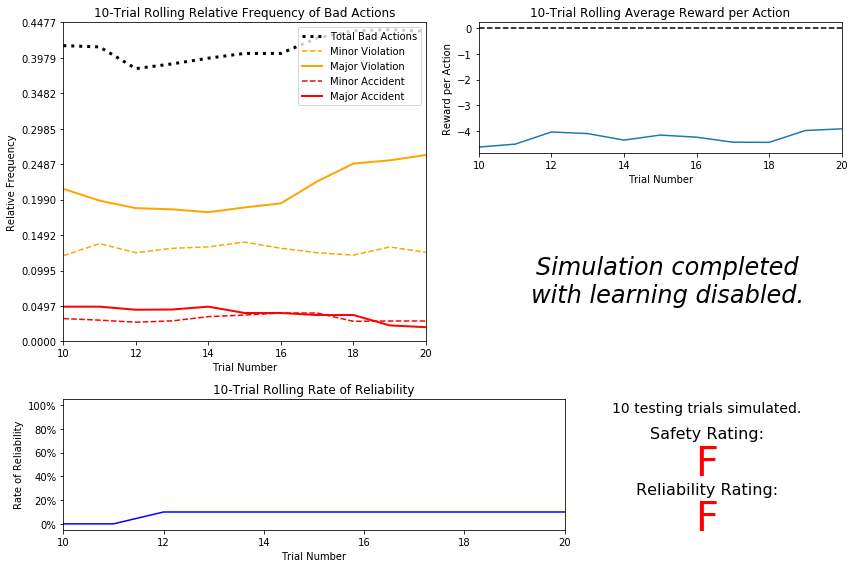

In [11]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

<b>Question 3</b>: Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. 

<b>Answer 3</b>: The smartcab makes bad decisions at roughly constant rate of 0.4, and both minor and major accidents occur at an approixmately constant rate of 0.05.

The agent mostly recieives rewards with a value of 0.5 to 3 for positive actions, and -5 to -10 for minor violations. Major violations produce rewards of -30 to -40. The rewards suggest the agent is being strongly penalized because the average reward per action is close to -5.

As the number of trials increases the results are roughly unchanged, which is to be expected because the only difference between trials are random features such as the other cars.

This Smartcab is neither reliable nor safe, as it reaches the destination no more than 10% of the time and makes bad decisions 40% of the time.

<b>Question 4</b>: Which features available to the agent are most relevant for learning both safety and efficiency? Why are these features appropriate for modeling the Smartcab in the environment? If you did not choose some features, why are those features not appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.

<b>Answer 4</b>: In defining state space the most important variable for reliability is the waypoint (with three substates) because moving in the waypoint direction is the trivial optimal policy for minimizing travel time in the abscence of other features. This also means that the 'deadline' feature is unnecesary because it will not help the Smartcab reach the destination any sooner than it will by simply following the waypoint.

The most important variable for safety is the traffic light (with two substates) because a policy of stopping at red lights and moving only forward or right through green lights will always give the smartcab right-of-way regardless of the motion of other cars.

To find a compromise between safety and reliability, the smartcab needs to learn how to expand its range of safe actions so that it is less likey to encounter states where it cannot move toward the waypoint. This requires knowledge of the direction of other cars, so the state of 'incoming', 'right' and 'left', (each with 4 substates) should be included as well. Technically not all combinations states need to be considered because only a few can lead to accident or right-of-way violation, but we want the Smartcab to learn this without knowing it beforehand.

<b>Question 5</b>: If a state is defined using the features you've selected from Question 4, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?

<b>Answer 5</b>: The combination of 3 waypoint substates, 2 traffic light substates, and 3 other drivers with 4 substates each gives a total of 3x2x4x4x4 = 384.

The states are encountered effectively at random, since only the waypoint is deterministic. However, the waypoint changes in each trial. Thus if the number of trials times the number of steps exceeds the state space, it should be possible to learn a policy for each state. There are about 30 steps per trial, so with significantly more than 100 trials the optimal policy should be achievable. The simulation is rather fast with the display turned off, so this is a reasonable amount of trials.

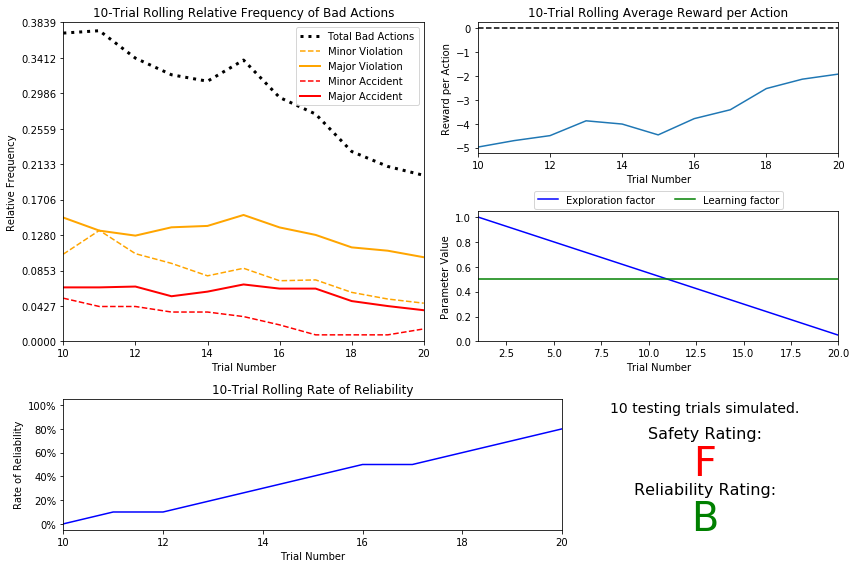

In [12]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

<b>Question 6</b>: Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in Question 3. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning.


<b>Answer 6</b>: The rate of bad actions, although it starts to decrease, is similar to the basic agent for the first 10 trials with a value near 0.4. The relability however is much better, as increases almost immediatley at a steady rate to almost 80%.

The simulation required 20 training trials, which is exactly as predicted given that the epsilon starts at 1 and changes by 0.05 ( = 1/20) each trial until it reaches 0.05 (tolerance).

The linear decaying epsilon is represented by the straight light with slope of 0.05 in the parameters panel.

As the trials increased, the bad actions decreased and rewards increased by small quantities. This suggests the Smartcab is learning, but needs many more trials to achieve sufficient safety and reliability.

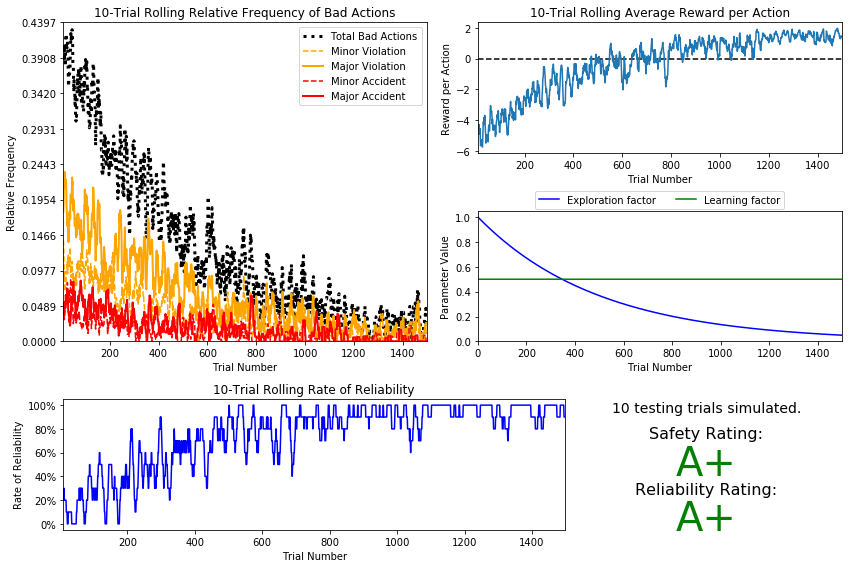

In [13]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

<b>Question 7</b>: Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in Question 6.

<b>Answer 7</b>: I used an exponential decaying function for epsilon: epsilon = exp(-0.002 trial). This required a total of about 1400 training trials. The large number of trials appears to be necessary because the algorithm has strange convergance behavior. There are sudden, sharp drops in relability and sudden increases in bad actions at certain points. This likely represents the Smartcab falling in to a new sequence of unlearned states after learning a portion of the Q table.

I used an epsilon tolerance of 0.05 because the exponential function requires a finite (non-zero) epsilon to converge to the tolerance value. I used a learning rate of 0.5 because this appeared to demonstrate effective learning behavior for the unoptimized model. 

This produced a huge improvement from a an unoptimizied safety rating of F to A+, and from an unoptimized reliability rating of B to A+. Obviously the agent has learned a succesful policy.

<b>Question 8</b>: Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? You can explain with words or a table, but you should thoroughly discuss the optimal policy.
Next, investigate the 'sim_improved-learning.txt' text file to see the results of your improved Q-Learning algorithm. For each state that has been recorded from the simulation, is the policy (the action with the highest value) correct for the given state?

<b>Answer 8</b>: The state has the form: (waypoint,(light,oncoming,right,left)). The optimal policy is easy to understand by considering a decision tree with branches in the same order as this tuple:

Branch 1: First, get the waypoint. <br><br>

Branch 2, choice 1: If light = red, the best policy is to choose no action, unless waypoint = right.<br>
Branch 3: If waypoint = right, get the state of the leftward car. If left = forward, there is a car coming and the best policy is none. Otherwise, go right.
 <br><br>
Branch 2, choice 2: If light = green and waypoint = right or waypoint = forward, follow waypoint. Otherwise (if waypoint = left) consider the state of oncoming driver.<br>
Branch 3: If oncoming = forward or oncoming = right, the agent cannot turn left. Go forward or 
             right.  
             
             
From the Q table, some representative points are:<br>

('right', ('red', 'left', 'forward', None))
 -- forward : -35.34
 -- right : 2.14
 -- None : 0.38
 -- left : -38.88
<br>
 ('right', ('green', None, 'right', 'forward'))
 -- forward : 0.00
 -- right : 2.10
 -- None : -4.23
 -- left : 0.52
 <br>
 'right', ('red', 'right', 'forward', 'forward'))
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.73
 -- left : 0.00
 <br>
These demonstrate that the Smartcab should always follow the waypoint right regardless of light, unless there is an oncoming car to the left at a red light, for which it should take no action.<br><br>


('left', ('green', 'forward', 'left', 'left'))
 -- forward : -0.19
 -- right : 0.48
 -- None : 0.00
 -- left : 0.00
 <br>
 ('left', ('green', None, 'forward', None))
 -- forward : 1.09
 -- right : 1.23
 -- None : -5.02
 -- left : 1.43
<br>
('left', ('green', 'forward', None, 'right'))
 -- forward : 1.01
 -- right : 0.15
 -- None : -4.73
 -- left : -18.29
<br>
These demonstrate that the Smartcab should follow the waypoint left at a green light, unless there is an oncoming car, for which it should go right or forward.<br>

I cannot seem to find a suboptimal Q value. There are some states with zero Q for some of the actions, which suggests they have not been visited enough for convergence, but all still have a small positive value for the correct optimal Q.

<b>Answer 9</b>: Although the smartcab has a definite goal, it is already built in to the local reward structure of the smartcab state because the trivial policy of following the waypoint will always reach the destination in the shortest time. Any deviation from this trivial policy will be due to safety. 

Including future rewards cannot improve upon the trivial policy- at best it can shift the policy balance back towards following the waypoint. However, this is pointless because the smartcab can always find the trivial policy by ignoring safety without future rewards and we are specifically looking for the deviations from it due to safety.

Additionally, the input sensor states are random because the lights and drivers at each light at completely independent of those at nearby intersections. This means that the order of sensor states should not matter with respect to finding the maximum Q. However, because of random fluctuations there might be particular sequence of states in a particular simulation that involves more or less than the average number of crashes, so future rewards might incorrectly bias the learning towards or against these sequences.